In [1]:
import pandas as pd  
import numpy as np  
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn 
%matplotlib inline

# Import the globalization dataset

In [2]:
df=pd.read_csv(r'API_KOF')

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.881564e+08,-3.146927e+08,2.263714e+08,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.349794e+08,NaN,NaN
1,Afghanistan,AFG,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.217342e+07,5.682366e+07,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.341936e+07,NaN
2,Angola,AGO,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.023771e+09,-1.464628e+09,-7.120017e+09,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09,NaN
3,Albania,ALB,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.048707e+09,9.179946e+08,1.254151e+09,1.149928e+09,9.895783e+08,1.044390e+09,1.022758e+09,1.204383e+09,1.208739e+09,NaN
4,Andorra,AND,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for v in df['Indicator Name']:
    methodology=[]
    methodology.append(v)
    break
print(methodology)

['Foreign direct investment, net inflows (BoP, current US$)']


In [5]:
df.drop(columns=['Indicator Name','Indicator Code','Unnamed: 64'])

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.867598e+08,4.881564e+08,-3.146927e+08,2.263714e+08,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.349794e+08,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.907744e+08,5.217342e+07,5.682366e+07,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.341936e+07
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.227211e+09,-3.023771e+09,-1.464628e+09,-7.120017e+09,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.089898e+09,1.048707e+09,9.179946e+08,1.254151e+09,1.149928e+09,9.895783e+08,1.044390e+09,1.022758e+09,1.204383e+09,1.208739e+09
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.900488e+08,5.353265e+08,2.930898e+08,3.714922e+08,1.998884e+08,3.433506e+08,2.437871e+08,2.868352e+08,3.185430e+08,3.040855e+08
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.886418e+08,-5.178429e+08,-1.423919e+07,-1.335709e+08,-2.331047e+08,-1.544481e+07,-5.610000e+08,-2.698500e+08,-2.820983e+08,NaN
261,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.693272e+09,4.139289e+09,4.626029e+09,8.232519e+09,5.791659e+09,1.521140e+09,2.215307e+09,2.058580e+09,5.569462e+09,4.624503e+09
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.729300e+09,1.108500e+09,1.731500e+09,2.099800e+09,1.507800e+09,1.582667e+09,6.628139e+08,1.107520e+09,4.084385e+08,4.814047e+08


In [6]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

In [7]:
kof=(pd.DataFrame(df,columns=['Country Name','Country Code','2017'])
    .rename(columns={'Country Name':'Country'})
)

In [8]:
##saving the summarized globalization data so that it's easier to pull for other regressions

In [9]:
kof.to_csv(r'..//Data/cof_data.csv')

In [10]:
kof

,Country,Country Code,2017
0,Aruba,ABW,1.624636e+08
1,Afghanistan,AFG,5.153390e+07
2,Angola,AGO,-7.397295e+09
3,Albania,ALB,1.022758e+09
4,Andorra,AND,NaN
...,...,...,...
259,Kosovo,XKX,2.868352e+08
260,"Yemen, Rep.",YEM,-2.698500e+08
261,South Africa,ZAF,2.058580e+09
262,Zambia,ZMB,1.107520e+09


## import the slavery dataset 

In [11]:
df=pd.read_csv(r'..//Data/clean_slavery_index.csv',header=1)

In [12]:
#rename the headers for easier access and smoother merge
#esp country, as it's been a PiTA

In [13]:
slavery=(
df.rename(columns={
                    'Population \n(from United Nations Population Division, World Population Prospects)':'population',
                    'Est. prevalence of population in modern slavery (victims per 1,000 population)':'est victims per 1,000',
                    'Est. number of people in modern slavery':'est slavery population',
                    'Final overall (normalised, weighted) vulnerability score':'vulnerability score',
                    'Country ':'Country',
                    'TOTAL':'gov resp'
})
    .dropna()
    
)

In [14]:
slavery.head()

,Country,population,Region,"est victims per 1,000",est slavery population,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,gov resp,Credit rating
0,"Korea, Democratic People's Republic of","25,244,000",Asia and the Pacific,104.6,"2,640,000",87.6,52.0,30.3,32.4,12.3,...,-1.0,-1.0,0.3,4.8,0.0,0.0,0.4,-2.0,-5.6,D
1,Eritrea,"4,847,000",Africa,93.0,"451,000",71.0,50.6,33.7,48.1,25.9,...,-1.0,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D
2,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C
3,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,-1.0,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D
5,Mauritania,"4,182,000",Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,-1.0,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C


In [15]:
slavery.columns

Index(['Country', 'population', 'Region', 'est victims per 1,000',
       'est slavery population', 'Factor One Governance Issues ',
       'Factor Two Nourishment and Access ', 'Factor Three Inequality',
       'Factor Four Disenfranchised Groups', 'Factor Five Effects of Conflict',
       'vulnerability score', 'Support survivors', '%', 'Criminal justice',
       '%.1', 'Coordination', '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'gov resp',
       'Credit rating'],
      dtype='object')

In [16]:
slavery.dtypes

Country                                     object
population                                  object
Region                                      object
est victims per 1,000                      float64
est slavery population                      object
Factor One Governance Issues               float64
Factor Two Nourishment and Access          float64
Factor Three Inequality                    float64
Factor Four Disenfranchised Groups         float64
Factor Five Effects of Conflict            float64
vulnerability score                        float64
Support survivors                          float64
%                                          float64
Criminal justice                           float64
%.1                                        float64
Coordination                               float64
%.2                                        float64
NEG Government  complicity (1.4.3)         float64
NEG State-imposed forced labour (1.8.1)    float64
Address risk                   

## summarize the data into all indipendants

In [17]:
slavery2=pd.DataFrame(slavery,columns=['Country','population','Region','est victims per 1,000','est slavery population','vulnerability score','gov resp','Credit rating'])

In [18]:
slavery2.to_csv(r'..\Data\summarized_slavery.csv')

In [19]:
slavery2

,Country,population,Region,"est victims per 1,000",est slavery population,vulnerability score,gov resp,Credit rating
0,"Korea, Democratic People's Republic of","25,244,000",Asia and the Pacific,104.6,"2,640,000",73.3,-5.6,D
1,Eritrea,"4,847,000",Africa,93.0,"451,000",69.6,-2.0,D
2,Burundi,"10,199,000",Africa,40.0,"408,000",72.9,10.7,C
3,Central African Republic,"4,546,000",Africa,22.3,"101,000",100.0,2.5,D
5,Mauritania,"4,182,000",Africa,21.4,"90,000",62.0,15.5,C
...,...,...,...,...,...,...,...,...
162,Australia,"23,800,000",Asia and the Pacific,0.6,"15,000",4.3,63.8,BBB
163,New Zealand,"4,615,000",Asia and the Pacific,0.6,"3,000",1.9,57.6,BB
164,"Taiwan, China","23,486,000",Asia and the Pacific,0.5,"12,000",20.3,38.2,CCC
165,Canada,"35,950,000",Americas,0.5,"17,000",10.2,58.6,BB


### now merge the datasets

In [20]:
merged=(pd.merge(slavery2,kof,on="Country")
    .rename(columns={'2017':'KOF'}))

In [21]:
merged

,Country,population,Region,"est victims per 1,000",est slavery population,vulnerability score,gov resp,Credit rating,Country Code,KOF
0,Eritrea,"4,847,000",Africa,93.0,"451,000",69.6,-2.0,D,ERI,5.546800e+07
1,Burundi,"10,199,000",Africa,40.0,"408,000",72.9,10.7,C,BDI,3.164734e+05
2,Central African Republic,"4,546,000",Africa,22.3,"101,000",100.0,2.5,D,CAF,6.871736e+06
3,Mauritania,"4,182,000",Africa,21.4,"90,000",62.0,15.5,C,MRT,5.882172e+08
4,Pakistan,"189,381,000",Asia and the Pacific,16.8,"3,186,000",74.1,18.6,C,PAK,2.496000e+09
...,...,...,...,...,...,...,...,...,...,...
136,Chile,"17,763,000",Americas,0.8,"14,000",25.6,62.3,BBB,CHL,5.852183e+09
137,Australia,"23,800,000",Asia and the Pacific,0.6,"15,000",4.3,63.8,BBB,AUS,4.754113e+10
138,New Zealand,"4,615,000",Asia and the Pacific,0.6,"3,000",1.9,57.6,BB,NZL,2.093698e+09
139,Canada,"35,950,000",Americas,0.5,"17,000",10.2,58.6,BB,CAN,2.910980e+10


#### just for security measures, adding all countries in a list

In [22]:
list_countries=[]
for cou in merged.Country:
    list_countries.append(cou)

print(list_countries)
len(list_countries)

['Eritrea', 'Burundi', 'Central African Republic', 'Mauritania', 'Pakistan', 'Cambodia', 'Somalia', 'Mongolia', 'Sudan', 'Chad', 'Rwanda', 'Turkmenistan', 'Myanmar', 'Brunei Darussalam', 'Belarus', 'Papua New Guinea', 'Thailand', 'Greece', 'Guinea', 'Libya', 'Philippines', 'Timor-Leste', 'Nigeria', 'Uganda', 'Madagascar', 'Malawi', 'Guinea-Bissau', 'Liberia', 'Angola', 'Djibouti', 'Kenya', 'Malaysia', 'Albania', 'Cameroon', 'Togo', 'Niger', 'Zimbabwe', 'Turkey', 'Ukraine', 'Equatorial Guinea', 'Ethiopia', 'India', 'Croatia', 'Nepal', 'Montenegro', 'Lithuania', 'Zambia', 'Haiti', 'Russian Federation', 'Benin', 'Mozambique', 'Armenia', 'Uzbekistan', 'Sierra Leone', 'Ghana', 'Gabon', 'Indonesia', 'Tajikistan', 'Burkina Faso', 'Bulgaria', 'Azerbaijan', 'Georgia', 'Romania', 'Cyprus', 'Kazakhstan', 'Lesotho', 'Dominican Republic', 'Kosovo', 'Latvia', 'Israel', 'Cuba', 'Bangladesh', 'Hungary', 'Estonia', 'Mali', 'Botswana', 'Singapore', 'Bosnia and Herzegovina', 'Honduras', 'Poland', 'Serbia

141

In [23]:
merged.describe()

,"est victims per 1,000",vulnerability score,gov resp,KOF
count,141.000000,141.000000,141.000000,1.400000e+02
mean,5.733333,43.155319,42.051773,1.267728e+10
std,8.848653,20.643890,16.255819,3.958661e+10
min,0.300000,1.000000,-2.500000,-3.614312e+10
25%,2.100000,28.900000,31.700000,3.648594e+08
50%,3.800000,46.200000,41.100000,1.395783e+09
75%,6.700000,57.000000,55.600000,6.179805e+09
max,93.000000,100.000000,75.200000,3.546490e+11


### two outliers on KOF and victims need to be moved, pliot needs to zoom too

In [24]:
merged

,Country,population,Region,"est victims per 1,000",est slavery population,vulnerability score,gov resp,Credit rating,Country Code,KOF
0,Eritrea,"4,847,000",Africa,93.0,"451,000",69.6,-2.0,D,ERI,5.546800e+07
1,Burundi,"10,199,000",Africa,40.0,"408,000",72.9,10.7,C,BDI,3.164734e+05
2,Central African Republic,"4,546,000",Africa,22.3,"101,000",100.0,2.5,D,CAF,6.871736e+06
3,Mauritania,"4,182,000",Africa,21.4,"90,000",62.0,15.5,C,MRT,5.882172e+08
4,Pakistan,"189,381,000",Asia and the Pacific,16.8,"3,186,000",74.1,18.6,C,PAK,2.496000e+09
...,...,...,...,...,...,...,...,...,...,...
136,Chile,"17,763,000",Americas,0.8,"14,000",25.6,62.3,BBB,CHL,5.852183e+09
137,Australia,"23,800,000",Asia and the Pacific,0.6,"15,000",4.3,63.8,BBB,AUS,4.754113e+10
138,New Zealand,"4,615,000",Asia and the Pacific,0.6,"3,000",1.9,57.6,BB,NZL,2.093698e+09
139,Canada,"35,950,000",Americas,0.5,"17,000",10.2,58.6,BB,CAN,2.910980e+10


In [25]:
highcountries= merged[merged['est victims per 1,000'] > 10] #based on 75 percentile
        
restofcount= merged[merged['est victims per 1,000'] <= 10]

In [26]:
restofcount.describe()

,"est victims per 1,000",vulnerability score,gov resp,KOF
count,125.000000,125.000000,125.00000,1.240000e+02
mean,3.843200,40.045600,44.76320,1.417210e+10
std,2.157856,19.125386,14.68431,4.184575e+10
min,0.300000,1.000000,-2.50000,-3.614312e+10
25%,2.100000,26.200000,33.20000,4.259245e+08
50%,3.400000,44.100000,45.70000,1.750605e+09
75%,5.600000,53.100000,57.60000,1.028089e+10
max,8.900000,74.100000,75.20000,3.546490e+11


# ( ͡° ͜ʖ ͡°) lenny approves of this std

In [27]:
highcountries.describe()

,"est victims per 1,000",vulnerability score,gov resp,KOF
count,16.000000,16.000000,16.000000,1.600000e+01
mean,20.500000,67.450000,20.868750,1.092361e+09
std,20.734802,15.608886,11.996484,1.188995e+09
min,10.300000,43.500000,-2.000000,3.164734e+05
25%,11.150000,60.800000,15.350000,2.429507e+08
50%,12.150000,64.700000,18.750000,5.280724e+08
75%,17.950000,74.300000,31.125000,1.642249e+09
max,93.000000,100.000000,40.100000,4.002425e+09


# ( ͠° ͟ʖ ͡°) lenny disapproves of this one

# ignore but leave because i worked too hard on this

In [28]:
df64=(
pd.read_csv(r'C:\Users\mahaa\Projects\module-2_projects\04_visualizing-real-world-data-project\globalization_2017_long.csv',)
  .rename(columns={'Unnamed: 0':'Country','Unnamed: 1':'Country Code','Unnamed: 2':'year'})  
    .drop([0])
)
df64.describe

<bound method NDFrame.describe of        Country Country Code  year economic globalization actual flows  \
1        Aruba          ABW  1991                    NaN        68.12   
2        Aruba          ABW  1992                    NaN        67.56   
3        Aruba          ABW  1993                    NaN        67.00   
4        Aruba          ABW  1994                    NaN        65.33   
5        Aruba          ABW  1995                    NaN        67.10   
...        ...          ...   ...                    ...          ...   
9290  Zimbabwe          ZWE  2010                43.6155     53.25763   
9291  Zimbabwe          ZWE  2011               46.60036     60.50163   
9292  Zimbabwe          ZWE  2012                45.9212     57.05209   
9293  Zimbabwe          ZWE  2013               45.16735     55.04377   
9294  Zimbabwe          ZWE  2014               39.60032     55.07465   

     restrictions social globalization personal contact information flows  \
1           

In [29]:
df64.loc[df64['year']==2017]

,Country,Country Code,year,economic globalization,actual flows,restrictions,social globalization,personal contact,information flows,cultural proximity,political globalization,overall globalization index


# import proper kofgi ranking

In [30]:
bnw=pd.read_csv(r'C:\Users\mahaa\Projects\module-2_projects\04_visualizing-real-world-data-project\KOFGI_2019_ranking.csv')

In [31]:
brave_new_world=(pd.DataFrame(bnw,columns=['Rank','Country','Globalisation Index, overall'])
      .set_index('Rank')
      .rename(columns={'Globalisation Index, overall':'KOFGI Rank'})
      .replace('.','0')
      .fillna(value=0)
      .astype({'KOFGI Rank':'float'})
     )
brave_new_world

,Country,KOFGI Rank
Rank,,
1,Switzerland,91.19
2,Netherlands,90.71
3,Belgium,90.59
4,Sweden,89.93
5,United Kingdom,89.84
...,...,...
199,Greenland,0.00
200,Guam,0.00
201,"Korea, Dem. Rep.",0.00


# regression analysis
#### we will treat victims per 1000 as the constant and play with the other parts

In [32]:
final_dataframe= brave_new_world.merge(restofcount, on='Country')
final_dataframe.head()

,Country,KOFGI Rank,population,Region,"est victims per 1,000",est slavery population,vulnerability score,gov resp,Credit rating,Country Code,KOF
0,Switzerland,91.19,"8,320,000",Europe and Central Asia,1.7,"14,000",1.5,60.0,BBB,CHE,1.293837e+11
1,Netherlands,90.71,"16,938,000",Europe and Central Asia,1.8,"30,000",6.1,75.2,A,NLD,9.625561e+10
2,Belgium,90.59,"11,288,000",Europe and Central Asia,2.0,"23,000",13.1,68.3,BBB,BEL,-3.614312e+10
3,Sweden,89.93,"9,764,000",Europe and Central Asia,1.6,"15,000",4.3,68.7,BBB,SWE,2.634793e+10
4,United Kingdom,89.84,"65,397,000",Europe and Central Asia,2.1,"136,000",11.1,71.5,BBB*,GBR,1.212546e+11


In [33]:
final_dataframe.describe()

,KOFGI Rank,"est victims per 1,000",vulnerability score,gov resp,KOF
count,122.000000,122.000000,122.000000,122.000000,1.210000e+02
mean,68.139918,3.780328,39.660656,45.026230,1.452092e+10
std,13.342895,2.129356,19.119989,14.572536,4.230570e+10
min,40.850000,0.300000,1.000000,-2.500000,-3.614312e+10
25%,56.117500,2.025000,25.750000,33.700000,4.648566e+08
50%,68.165000,3.350000,44.000000,45.750000,1.810396e+09
75%,80.362500,5.500000,52.925000,57.675000,1.035422e+10
max,91.190000,8.900000,74.100000,75.200000,3.546490e+11


In [51]:
final_dataframe.corr()

,KOFGI Rank,"est victims per 1,000",vulnerability score,gov resp,KOF
KOFGI Rank,1.000000,-0.530047,-0.841382,0.727392,0.303707
"est victims per 1,000",-0.530047,1.000000,0.672055,-0.374626,-0.233262
vulnerability score,-0.841382,0.672055,1.000000,-0.695986,-0.310126
gov resp,0.727392,-0.374626,-0.695986,1.000000,0.267417
KOF,0.303707,-0.233262,-0.310126,0.267417,1.000000


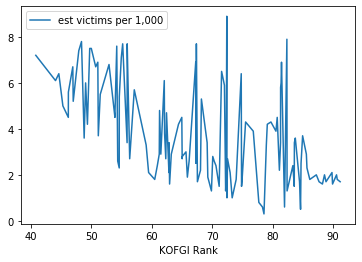

In [34]:
final_dataframe.plot(kind='line',x='KOFGI Rank',y='est victims per 1,000')

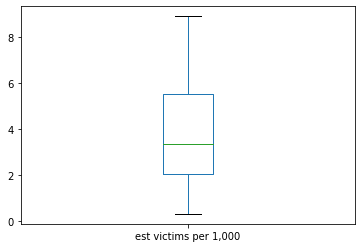

In [35]:
final_dataframe.plot(kind='box',x='KOFGI Rank',y='est victims per 1,000')

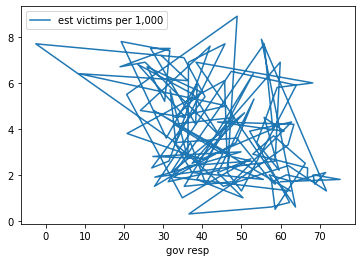

In [36]:
final_dataframe.plot(kind='line',x='gov resp',y='est victims per 1,000')

##ಠ_ಠ

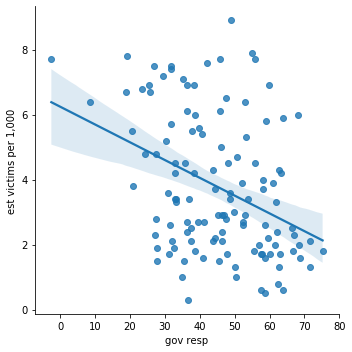

In [37]:
seaborn.lmplot(x='gov resp',y='est victims per 1,000',data=final_dataframe,fit_reg=True) 

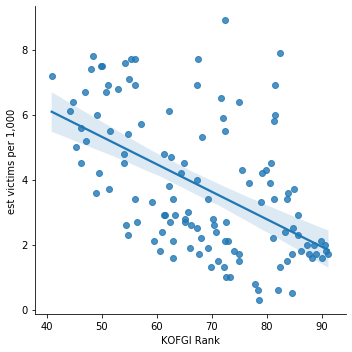

In [38]:
seaborn.lmplot(x='KOFGI Rank',y='est victims per 1,000',data=final_dataframe,fit_reg=True) 

In [49]:
model1=sm.OLS(final_dataframe['KOFGI Rank'],final_dataframe['est victims per 1,000']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             KOFGI Rank   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              225.0
Date:                Mon, 13 Jul 2020   Prob (F-statistic):                    2.23e-29
Time:                        00:56:39   Log-Likelihood:                         -626.33
No. Observations:                 122   AIC:                                      1255.
Df Residuals:                     121   BIC:                                      1257.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
est victims per 1,000    12.9155      0.861     14.999      0.000      11.211      14.620
==============================================================================
Omnibus:                       21.418   Durbin-Watson:                   0.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.778
Skew:                          -0.360   Prob(JB):                       0.0205
Kurtosis:                       1.994   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
final_dataframe.corr()

,KOFGI Rank,"est victims per 1,000",vulnerability score,gov resp,KOF
KOFGI Rank,1.000000,-0.530047,-0.841382,0.727392,0.303707
"est victims per 1,000",-0.530047,1.000000,0.672055,-0.374626,-0.233262
vulnerability score,-0.841382,0.672055,1.000000,-0.695986,-0.310126
gov resp,0.727392,-0.374626,-0.695986,1.000000,0.267417
KOF,0.303707,-0.233262,-0.310126,0.267417,1.000000


In [65]:
seaborn.lmplot(x='KOFGI Rank',y='vulnerability score',data=final_dataframe,fit_reg=True, color='red') 

TypeError: lmplot() got an unexpected keyword argument 'color'

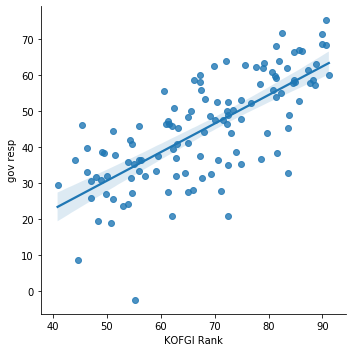

In [53]:
seaborn.lmplot(x='KOFGI Rank',y='gov resp',data=final_dataframe,fit_reg=True) 

In [95]:
brave_new_world2=(pd.DataFrame(bnw)
      .set_index('Rank')
      .rename(columns={'Globalisation Index, overall':'KOFGI Rank'})
      .replace('.','0')
      .fillna(value=0)
      .astype({'KOFGI Rank':'float','Globalisation Index, de facto':'float','Globalisation Index, de jure':'float'})
        .drop(columns=['Unnamed: 3','Unnamed: 7','Rank.1','Rank.2'])
     )


In [96]:
brave_new_world2

,Country,KOFGI Rank,Country.1,"Globalisation Index, de facto",Country.2,"Globalisation Index, de jure"
Rank,,,,,,
1,Switzerland,91.19,Switzerland,91.65,Luxembourg,93.04
2,Netherlands,90.71,Netherlands,90.66,United Kingdom,92.85
3,Belgium,90.59,Belgium,90.48,Sweden,92.51
4,Sweden,89.93,Ireland,88.71,Finland,91.83
5,United Kingdom,89.84,Austria,87.76,Netherlands,90.76
...,...,...,...,...,...,...
199,Greenland,0.00,Comoros,27.94,Eritrea,29.88
200,Guam,0.00,Greenland,26.72,French Polynesia,0.00
201,"Korea, Dem. Rep.",0.00,Guam,0.00,Greenland,0.00


In [73]:
model2=sm.OLS(final_dataframe['KOFGI Rank'],final_dataframe['gov resp']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             KOFGI Rank   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2528.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):                    6.02e-83
Time:                        02:52:59   Log-Likelihood:                         -502.16
No. Observations:                 122   AIC:                                      1006.
Df Residuals:                     121   BIC:                                      1009.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gov resp       1.4336      0.029     50.281      0.000       1.377       1.490
==============================================================================
Omnibus:                       14.956   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.790
Skew:                           0.784   Prob(JB):                     0.000226
Kurtosis:                       3.920   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model3=sm.OLS(final_dataframe['KOFGI Rank'],final_dataframe['vulnerability score']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             KOFGI Rank   R-squared (uncentered):                   0.664
Model:                            OLS   Adj. R-squared (uncentered):              0.662
Method:                 Least Squares   F-statistic:                              239.6
Date:                Mon, 13 Jul 2020   Prob (F-statistic):                    1.81e-30
Time:                        02:54:24   Log-Likelihood:                         -623.81
No. Observations:                 122   AIC:                                      1250.
Df Residuals:                     121   BIC:                                      1252.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
vulnerability score     1.2862      0.083     15.478      0.000       1.122       1.451
==============================================================================
Omnibus:                       17.804   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.800
Skew:                           0.319   Prob(JB):                       0.0334
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
export_data= brave_new_world2.merge(restofcount, on='Country')
export_data

,Country,KOFGI Rank,Rank.1,Country.1,"Globalisation Index, de facto",Rank.2,Country.2,"Globalisation Index, de jure",population,Region,"est victims per 1,000",est slavery population,vulnerability score,gov resp,Credit rating,Country Code,KOF
0,Switzerland,91.19,1,Switzerland,91.65,1,Luxembourg,93.04,"8,320,000",Europe and Central Asia,1.7,"14,000",1.5,60.0,BBB,CHE,1.293837e+11
1,Netherlands,90.71,2,Netherlands,90.66,2,United Kingdom,92.85,"16,938,000",Europe and Central Asia,1.8,"30,000",6.1,75.2,A,NLD,9.625561e+10
2,Belgium,90.59,3,Belgium,90.48,3,Sweden,92.51,"11,288,000",Europe and Central Asia,2.0,"23,000",13.1,68.3,BBB,BEL,-3.614312e+10
3,Sweden,89.93,4,Ireland,88.71,4,Finland,91.83,"9,764,000",Europe and Central Asia,1.6,"15,000",4.3,68.7,BBB,SWE,2.634793e+10
4,United Kingdom,89.84,5,Austria,87.76,5,Netherlands,90.76,"65,397,000",Europe and Central Asia,2.1,"136,000",11.1,71.5,BBB*,GBR,1.212546e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Tajikistan,46.23,170,Bhutan,45.03,170,"Micronesia, Fed. Sts.",47.86,"8,549,000",Europe and Central Asia,4.5,"39,000",55.8,33.0,CCC,TJK,1.858271e+08
118,Sierra Leone,45.33,175,Sierra Leone,43.48,175,Sao Tome and Principe,45.69,"7,237,000",Africa,5.0,"36,000",55.2,46.2,B,SLE,1.981748e+08
119,Equatorial Guinea,44.66,177,"Congo, Dem. Rep.",42.47,177,Marshall Islands,44.19,"1,175,000",Africa,6.4,"7,000",61.7,8.6,D,GNQ,3.040743e+08
120,Ethiopia,44.11,179,Angola,41.67,179,Myanmar,43.6,"99,873,000",Africa,6.1,"614,000",64.5,36.3,CCC,ETH,4.017160e+09
